# Tuning of Genetic Evaluators

Loading data for sigmoid center tuning

In [1]:
from data_processing_functions import *
from time import time
validation_measures = ["cost","precision","recall","f1","accuracy"]
corr_measure = "cost"
tuning_measure_prefix = "Inlier threshold pct"
names= ["GEIC","GEICS","GEUICS","GESC"]
csv_path_GEIC = "/home/jens/masterData/AlgorithmTuner/RANDGEIC/inlierThresholdTest/2021-25-02-09-56-40-data.csv"
csv_path_GEICS = "/home/jens/masterData/AlgorithmTuner/RANDGEICS/inlierThreshold/2021-25-02-10-00-13-data.csv"
csv_path_GESC = "/home/jens/masterData/AlgorithmTuner/RANDGESC/inlierThresholdTest/2021-25-02-10-02-12-data.csv"
csv_path_GEUICS = "/home/jens/masterData/AlgorithmTuner/RANDGESC/inlierThresholdTest/2021-25-02-10-02-12-data.csv"

paths = [csv_path_GEIC,csv_path_GEICS,csv_path_GESC]

## GEIC Correlation between cost and f1/precision as a function between Sigmoid Center


In [2]:
dfs = []
corr_dfs = []
tuning_measures=[]

for name,path in zip(names,paths):
    tuning_measures.append(tuning_measure:=name+"/"+tuning_measure_prefix)
    dfs.append(pd.read_csv(path, usecols = ["algName","objName","geName",tuning_measure]+validation_measures, dtype = {"algName":"category","objName":"category","geName":"category"}))
    corr_dfs.append(dfs[-1].groupby(["geName","objName",tuning_measure]).corrwith(dfs[-1][corr_measure]).reset_index())
    corr_dfs[-1].rename(columns={tuning_measure:tuning_measure_prefix},inplace=True)


In [3]:
corr_df = pd.concat(corr_dfs).reset_index()

### F1 correlation

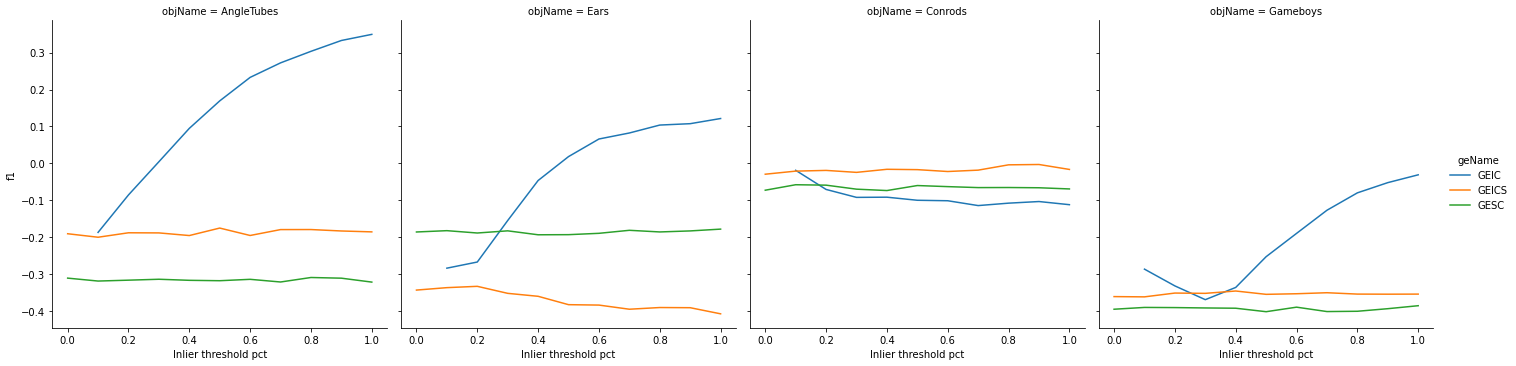

In [4]:
cost_corr_plot = sns.relplot(x=tuning_measure_prefix,y="f1",col="objName",hue="geName",data=corr_df,kind="line",facet_kws={'sharey': True, 'sharex': True}) 

## Precision correlation

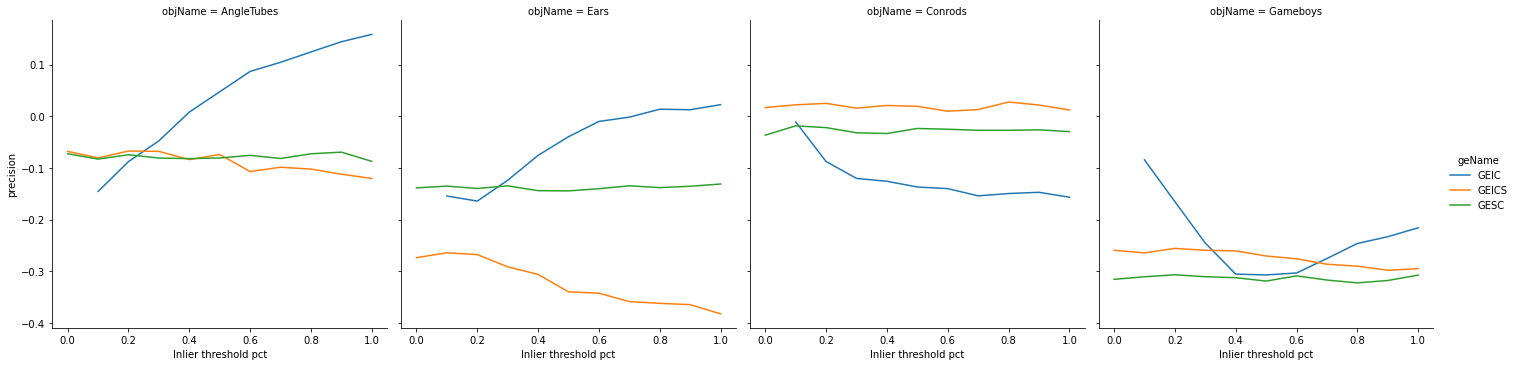

In [5]:
cost_corr_plot = sns.relplot(x=tuning_measure_prefix,y="precision",col="objName",hue="geName",data=corr_df,kind="line",facet_kws={'sharey': True, 'sharex': True}) 

In [8]:
print("Best Params for Correlation between cost and f1")
print(best_param_f1)
best_param_f1, best_idx_f1 = get_best_cost_corr_parameters(corr_df,"f1",tuning_measure_prefix)
print_best_cost_corr_parameters(best_param_f1,tuning_measure_prefix)

print("\nBest Params for Correlation between cost and pecision")
print(best_param_precision)
best_param_precision, best_idx_precision = get_best_cost_corr_parameters(corr_df,"precision",tuning_measure_prefix)
print_best_cost_corr_parameters(best_param_precision,tuning_measure_prefix)




Best Params for Correlation between cost and f1
        objName geName  Inlier threshold pct        f1
1    AngleTubes   GEIC                   0.1 -0.187158
12         Ears   GEIC                   0.1 -0.284157
29      Conrods   GEIC                   0.7 -0.114516
36     Gameboys   GEIC                   0.3 -0.369518
45   AngleTubes  GEICS                   0.1 -0.200299
65         Ears  GEICS                   1.0 -0.407896
66      Conrods  GEICS                   0.0 -0.029488
78     Gameboys  GEICS                   0.1 -0.361914
98   AngleTubes   GESC                   1.0 -0.321910
103        Ears   GESC                   0.4 -0.193652
114     Conrods   GESC                   0.4 -0.073774
126    Gameboys   GESC                   0.5 -0.402129
AngleTubes,GEIC,Inlier threshold pct,0.1
Ears,GEIC,Inlier threshold pct,0.1
Conrods,GEIC,Inlier threshold pct,0.7
Gameboys,GEIC,Inlier threshold pct,0.3
AngleTubes,GEICS,Inlier threshold pct,0.1
Ears,GEICS,Inlier threshold pct,1.0
Conrod